In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Прочитайте данные (переменную назовите 'df')
df1 = pd.read_csv('data (1).csv')

# Вывести несколько первых строк таблицы данных
print(df1.head(40))

          Дата  Склад Контрагент Номенклатура  Количество
0   2018-01-04      1  address_0    product_0           4
1   2018-01-04      1  address_0    product_1           4
2   2018-01-04      1  address_0    product_2           5
3   2018-01-04      1  address_0    product_3          10
4   2018-01-04      1  address_0    product_4           2
5   2018-01-04      1  address_0    product_5           2
6   2018-01-04      1  address_0    product_6           0
7   2018-01-04      1  address_0    product_7           1
8   2018-01-04      1  address_0    product_8           1
9   2018-01-04      1  address_0    product_9           0
10  2018-01-04      1  address_0   product_10           2
11  2018-01-04      1  address_0   product_11           2
12  2018-01-04      1  address_0   product_12           3
13  2018-01-04      1  address_0   product_13           4
14  2018-01-04      1  address_0   product_14           2
15  2018-01-04      1  address_0   product_15           2
16  2018-01-04

In [17]:
df1.tail()

,Дата,Склад,Контрагент,Номенклатура,Количество
301350,2018-08-31,5,address_173,product_15,0
301351,2018-08-31,5,address_173,product_17,1
301352,2018-08-31,5,address_173,product_18,1
301353,2018-08-31,5,address_173,product_19,0
301354,2018-08-31,5,address_173,product_20,2


Проверяем формат столбцов

In [18]:
df1.dtypes

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

Сразу переведем столбец "Дата" в правильный формат

In [19]:
df1['Дата'] = pd.to_datetime(df1['Дата'], format='%Y-%m-%d')

In [20]:
df1.dtypes

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object

Сгруппируйте данные по дате, посчитайте количество продаж

In [21]:
grouped_df = df1.groupby('Дата').agg({'Количество': 'sum'}).reset_index()

Вывести несколько первых строк сгруппированных данных

In [22]:
grouped_df.head()

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

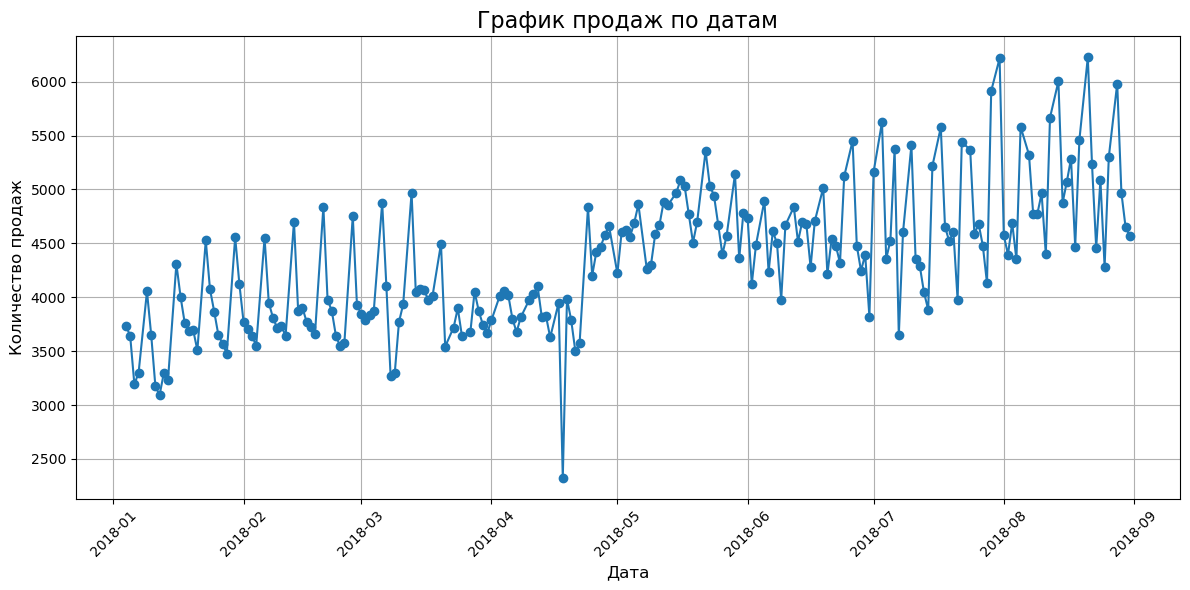

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', linestyle='-')
plt.title('График продаж по датам', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество продаж', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# На графике слишком много данных поэтому она не читабельно. Я решил затем брать метки по определенному интервалу чтобы легче было описать первый график

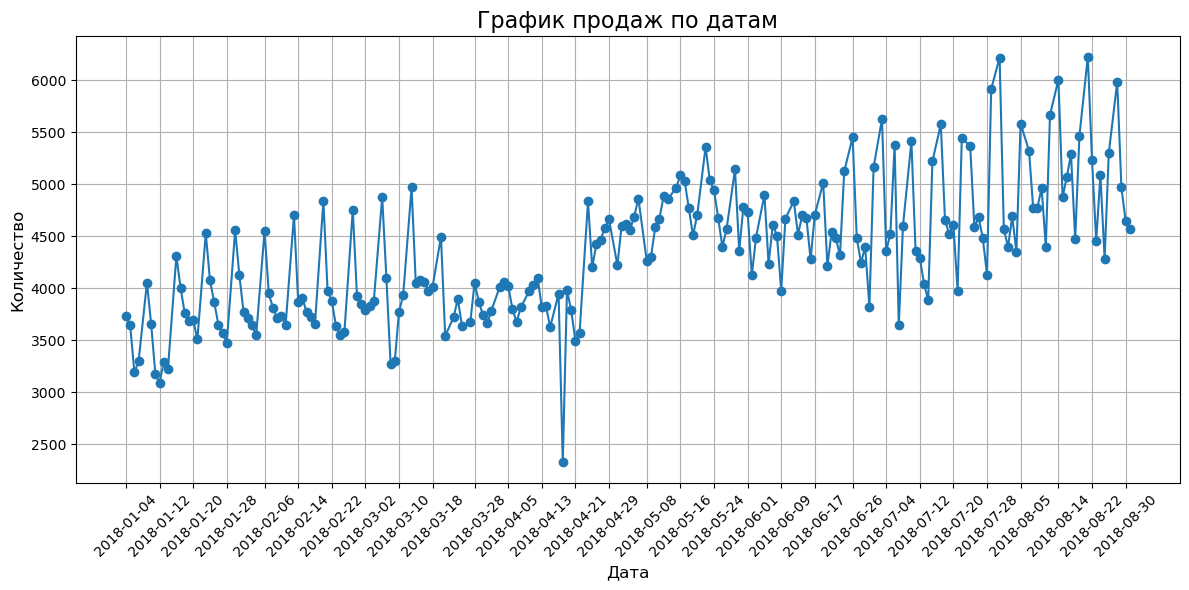

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', linestyle='-')
plt.title('График продаж по датам', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.grid(True)
plt.xticks(grouped_df['Дата'][::7], rotation=45)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

# Обзор Тренда
### Вначале периода, то есть в январе продажи были примерно в диапазоне от 3500 до 4500. Начиная с февраля мы можем увидеть постепенный рост продаж который увеличивается примерно до 5000. Но в апреле наблюдается резкое падение продаж до чуть ниже 2500. Но падения были кратковременными и они снова начали расти с каждым месяцем. В конце периода продажи дошли до примерно 6000.
# Колебания
### На протяжении всего периода мы можем заметить сильные колебания в продажах. Колебания варируются в разных месяцах. Если с января до марта и с августа до ноября продажи колебались сильно, то с марта до августа они были меньше. Я считаю что это связано с сезонными факторами которые сильно влияют на спрос.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [25]:
Q1 = np.percentile(grouped_df['Количество'], 25)
Q3 = np.percentile(grouped_df['Количество'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = grouped_df[grouped_df['Количество'] > upper_bound]
max_outlier = outliers.loc[outliers['Количество'].idxmax()]
print(max_outlier)

Дата          2018-08-21 00:00:00
Количество                   6226
Name: 195, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [27]:
df1['Дата'] = pd.to_datetime(df1['Дата'], format='%Y-%m-%d')
df1['День недели'] = df1['Дата'].dt.day_name()

filtered_data = df1[
    (df1['День недели'] == 'Wednesday') & 
    (df1['Дата'].dt.month.isin([6, 7, 8])) & 
    (df1['Склад'] == 3)
]

top_product = (filtered_data.groupby('Номенклатура').agg({'Количество': 'sum'}).reset_index().sort_values(by='Количество', ascending=False).head(1))
print("Топовый товар по средам на 3 складе за летние месяцы:")
print(top_product)

Топовый товар по средам на 3 складе за летние месяцы:
  Номенклатура  Количество
1    product_1        2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [47]:
weather_file_path = 'weatherr.xlsx'
raw_weather_df = pd.read_excel(weather_file_path, sheet_name='Архив Погоды rp5')

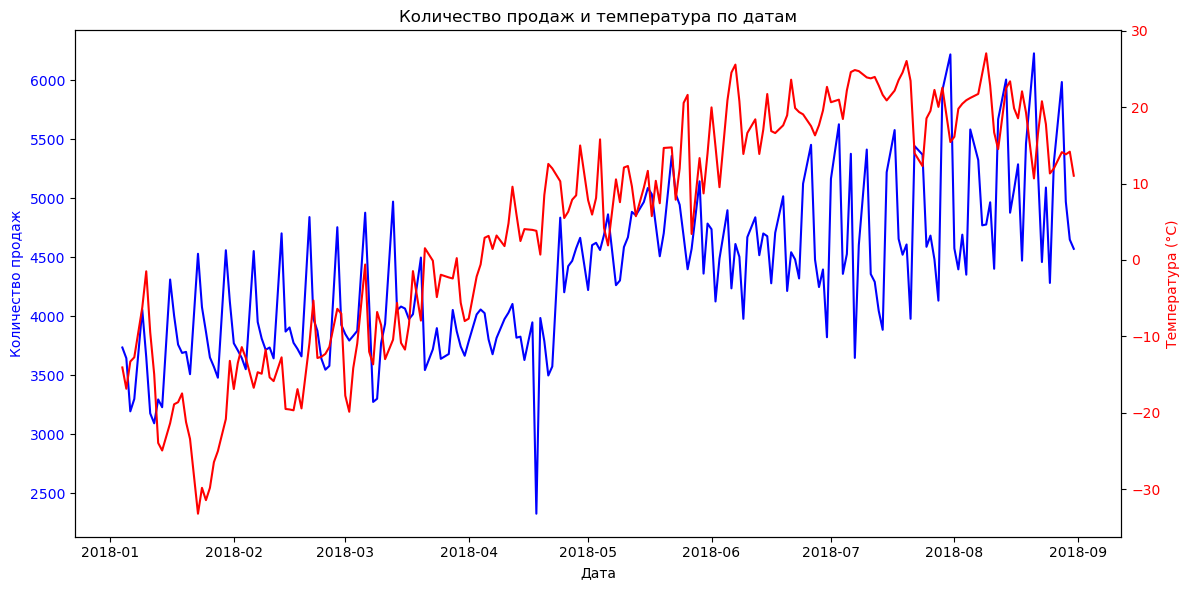

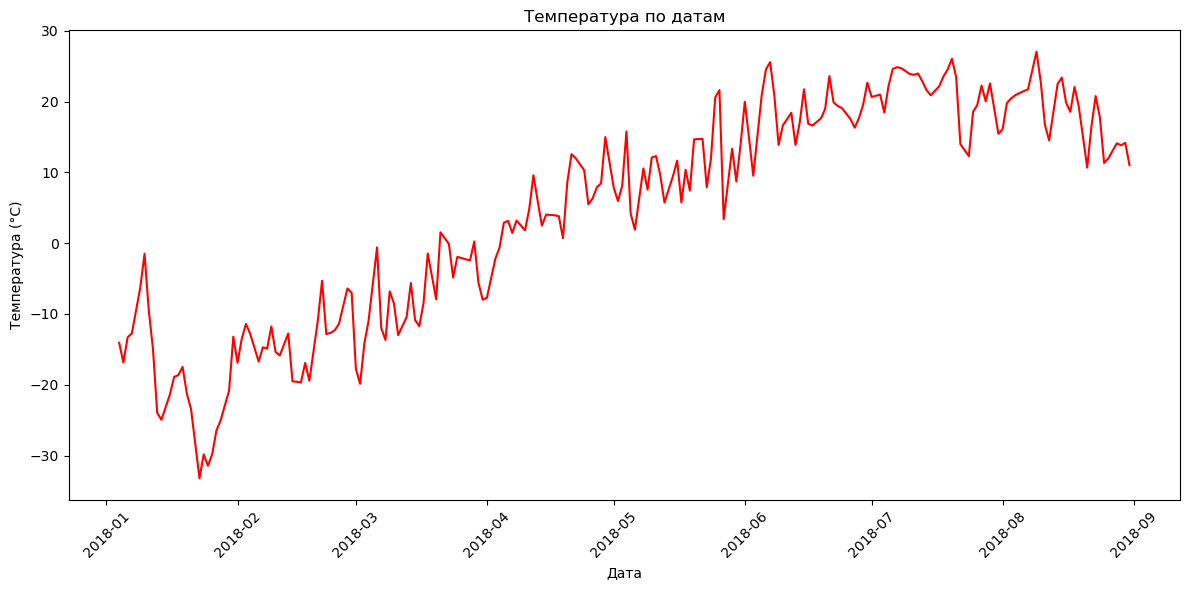

In [52]:
weather_df_cleaned = weather_df_cleaned[pd.to_numeric(weather_df_cleaned['T'], errors='coerce').notna()]
weather_df_cleaned['T'] = weather_df_cleaned['T'].astype(float)
weather_df_cleaned['Местное время в Астане'] = pd.to_datetime(weather_df_cleaned['Местное время в Астане'], format='%d.%m.%Y %H:%M', errors='coerce')

weather_df_cleaned = weather_df_cleaned.dropna(subset=['Местное время в Астане', 'T'])
weather_df_cleaned['Дата'] = weather_df_cleaned['Местное время в Астане'].dt.date
weather_df_daily = weather_df_cleaned.groupby('Дата').agg({'T': 'mean'}).reset_index()
weather_df_daily.columns = ['Дата', 'Температура']

weather_df_daily['Дата'] = pd.to_datetime(weather_df_daily['Дата'])



merged_df = pd.merge(grouped_df, weather_df_daily, on='Дата', how='inner')
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(merged_df['Дата'], merged_df['Количество'], color='blue', label='Количество продаж')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(merged_df['Дата'], merged_df['Температура'], color='red', label='Температура (°C)')
ax2.set_ylabel('Температура (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Количество продаж и температура по датам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Дата'], merged_df['Температура'], color='red', label='Температура (°C)')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.title('Температура по датам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
